# Workshop 01

<b><u>Obiettivo</u></b>: Convertire scripts da <i>classic PLaSM</i> a <i>pyplasm.</i>

- <b>Script 1.5.3</b> (Table model):

In [17]:
# PLASM:
DEF Leg = CUBOID:< 0.1,0.1,0.7 >;
DEF Plane = CUBOID:< 1, 1, 0.2>;
    
DEF Table = STRUCT:<
    Leg, T:1:0.9, Leg, T:2:0.9, Leg, T:1:-0.9, Leg, T:<2,3>:<-0.9,0.7>, Plane >;
            
DEF Table1 = STRUCT:<
    Leg, T:1:0.9:Leg, T:<1,2>:<0.9,0.9>:Leg, T:2:0.9:Leg, T:3:0.7:Plane >;
                                                    
VRML: Table:'out.wrl';

SyntaxError: invalid syntax (<ipython-input-17-545ff2204493>, line 2)

In [1]:
#PYPLASM:

# Importo le librerie:
import sys
sys.path.insert(0, 'C:\Users\Camilla Bianca\Documents\GGPL\lar-cc\larlib')
from larlib import *
# Creo una gamba del tavolo:
Leg = CUBOID([0.1,0.1,0.7])
# Creo il piano del tavolo:
Plane = CUBOID([1,1,0.2])
# Aggrego le 4 gambe col piano (funzioni composte):
Table = STRUCT([Leg, T(1)(0.9), Leg, T(2)(0.9), Leg, T(1)(-0.9),
                Leg, T([2,3])([-0.9,0.7]), Plane])
# Aggrego le 4 gambe del tavolo col piano:
Table1 = STRUCT([Leg,T(1)(0.9)(Leg), T([1,2])([0.9,0.9])(Leg), T(2)(0.9)(Leg),
                 T(3)(0.7)(Plane)])
# Visualizzo i due tavoli (uguali):
VIEW(Table)
VIEW(Table1)

Evaluating fenvs.py..
...fenvs.py imported in 0.0105383154449 seconds


<pyplasm.xgepy.Hpc; proxy of <Swig Object of type 'std::shared_ptr< Hpc > *' at 0x000000000C06C5A0> >

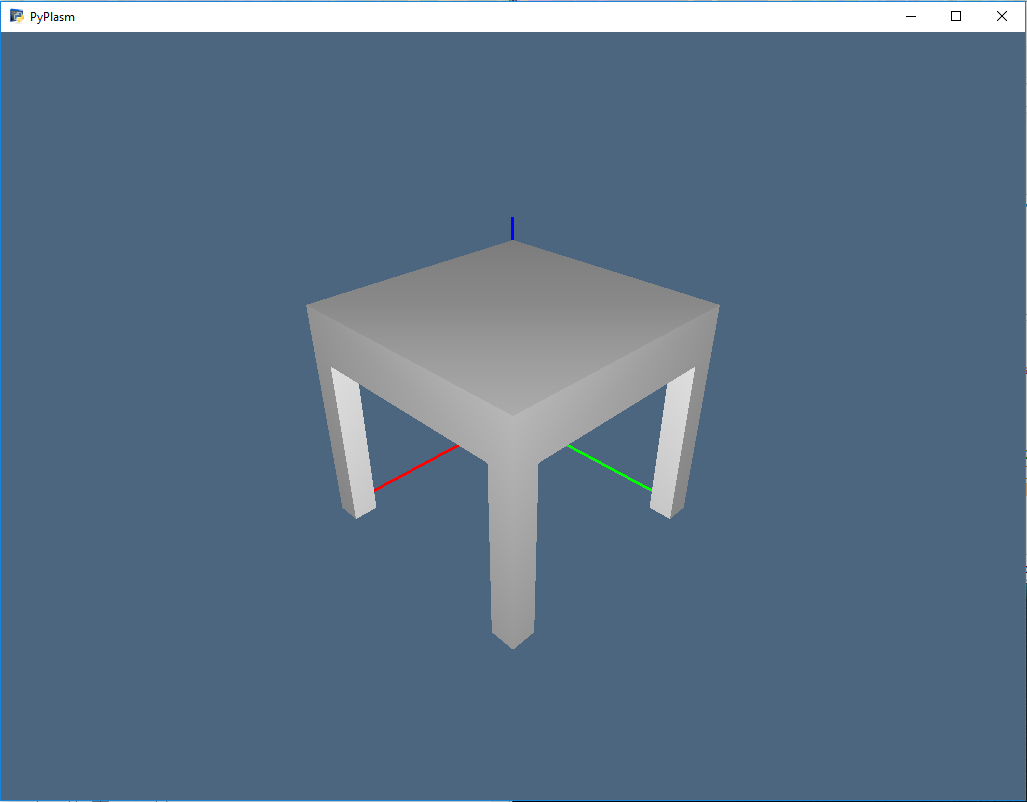

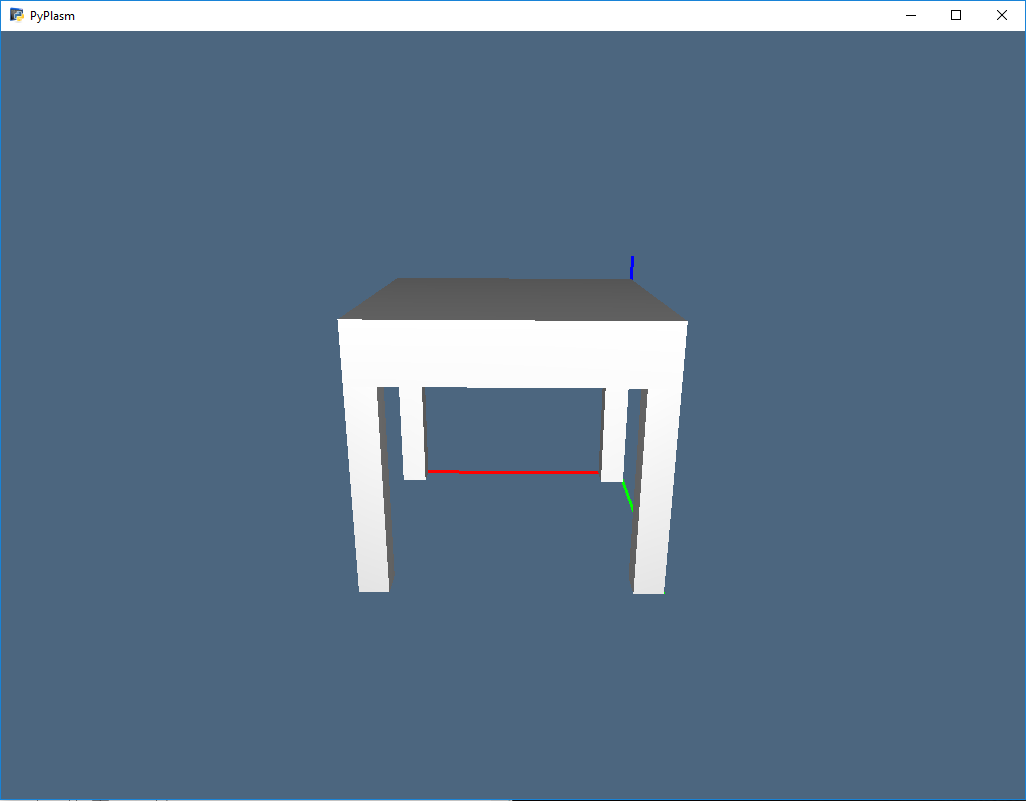

- <b>Script 1.5.6</b> (Building Facade)

In [18]:
DEF facade (n,m::IsIntPos) = STRUCT:<
    Q:xRithm * Q:yRithm,
    Q:xVoid * Q:yRithm,
    Q:xRithm * Q:yVoid ,
    @1:(Q:xVoid * Q:yVoid) >
WHERE
    xRithm = ##:n:<5,-2,-5,-2> AR 5,
    yRithm = ##:m:<7,-5,-2> AR 7,
    xVoid = AA:-:xRithm,
    yVoid = AA:-:yRithm
END;

SyntaxError: invalid syntax (<ipython-input-18-9064677922ab>, line 1)

In [11]:
import sys
sys.path.insert(0, 'C:\Users\Camilla Bianca\Documents\GGPL\lar-cc\larlib')
from larlib import *
# Funzione che ritorna un oggetto HPC che rappresenta una faccata di 
# n colonne ed m righe
def facade(n,m):
    # Creo l'array dei valori x e lo replico un numero di colonne pari a n:
    xRithm = [5,-2,-5,-2]*n
    # Appendo alla fine dell'array un 5:
    xRithm.append(5)
    # Creo l'array dei valori y e lo replico un numero di righe pari a m:
    yRithm = [7,-5,-2]*m
    # Appendo alla fine dell'array un 7:
    yRithm.append(7)
    # Creo copie degli array di x e di y, ma con i segni invertiti:
    xVoid=[-x for x in xRithm]
    yVoid=[-y for y in yRithm]
    # Ritorno il prodotto cartesiano tra i costruttori dei poliedri (QUOTE): 
    # i valori negativi nella sequenza sono usati per denotare
    # intervalli vuoti nel complesso:
    return STRUCT([PROD([QUOTE(xRithm),QUOTE(yRithm)]),
                   PROD([QUOTE(xVoid),QUOTE(yRithm)]),
                   PROD([QUOTE(xRithm),QUOTE(yVoid)]),
                   SKEL_1(PROD([QUOTE(xVoid),QUOTE(yVoid)]))])
VIEW(facade(10,5))

<pyplasm.xgepy.Hpc; proxy of <Swig Object of type 'std::shared_ptr< Hpc > *' at 0x000000000C1B2E10> >

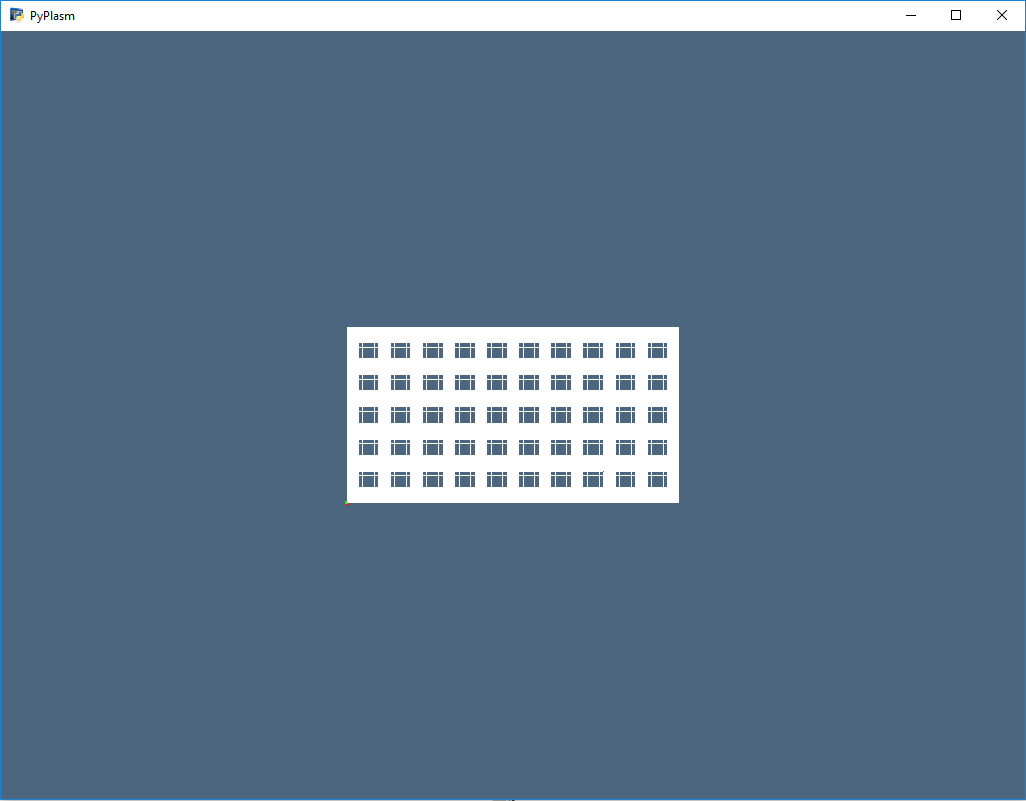